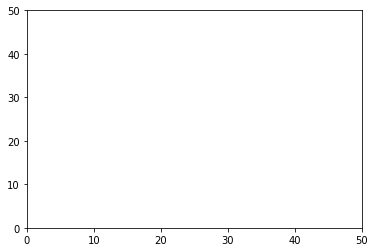

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

g = 9.81
h=0.01
x0=20.
y0=20.
Vx0=0.
Vy0=0.
limit = 50.
lost=0.3 #Коэффициент потерь для упругого удара

fig, ax = plt.subplots()

circle, = ax.plot([], [], 'bo', ms=10)
coord = np.array([x0,y0])
vel = np.array([Vx0,Vy0]) 

def init():
    ax.set_xlim([0., limit])
    ax.set_ylim([0., limit])
    return circle,

def updatefig_explicitEuler(frame):
    vel[1] = vel[1]+g*h
    coord[1] = coord[1]-h*vel[1]    
    if coord[1]<=0.:    
        vel[1]=-vel[1]*(1-lost)

    circle.set_xdata(coord[0])
    circle.set_ydata(coord[1])
    return circle,

def updatefig_implicitEuler(frame):
    vel[1] = vel[1]+g*h
    coord[1] = coord[1]+h*vel[1]-g*h**2    
    if coord[1]<=0.:    
        vel[1]=-vel[1]

    circle.set_xdata(coord[0])
    circle.set_ydata(coord[1])
    return circle,

anim = animation.FuncAnimation(fig, updatefig_explicitEuler, frames=2000000, init_func=init, interval=0.01, blit=True, repeat=False)
plt.show()